<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/SARIMAX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
resResutls = pd.read_csv('/content/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [4]:
resResutls.index.freq='D'

In [5]:
resResutls.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [8]:
 resResutls.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [7]:
resResutls= resResutls.dropna()

In [10]:
resResutls.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [11]:
cols=['rest1', 'rest2', 'rest3','rest4', 'total']

In [12]:
for columns in cols:
  resResutls[columns]=resResutls[columns].astype(int)

In [13]:
resResutls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


<Axes: xlabel='date'>

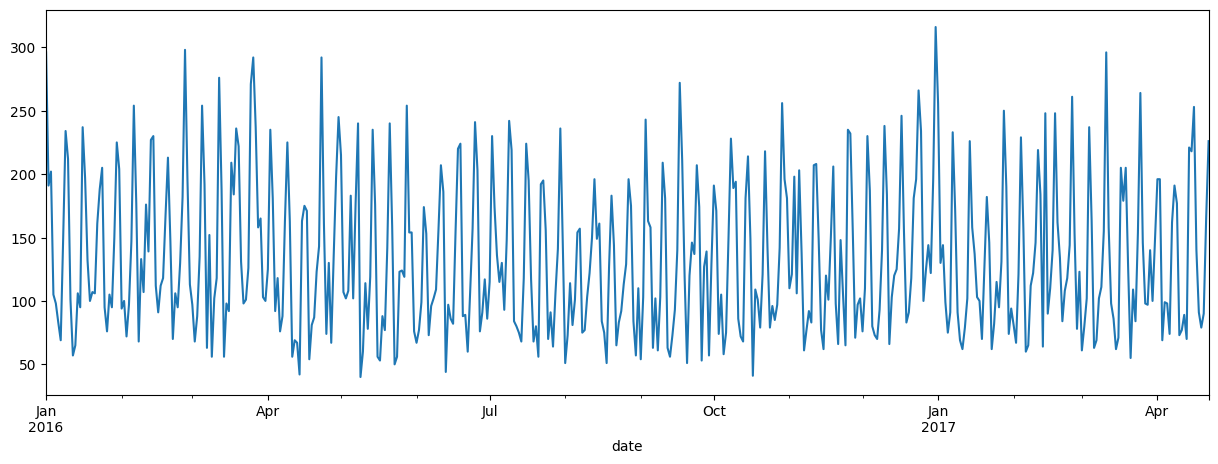

In [16]:
resResutls['total'].plot(figsize=(15,5))

In [ ]:
ax